In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline 

In [2]:
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_returns_csv)

In [3]:
whale_df.set_index(pd.to_datetime(whale_df['Date'], infer_datetime_format = True), inplace = True) 
whale_df.columns
whale_columns = ["date", "SOROS FUND MANAGEMENT LLC","PAULSON & CO.INC." , "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC"] 
whale_df.columns = whale_columns
whale_df.drop(['date'], axis=1, inplace = True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
whale_df.isnull().sum() 

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
whale_df = whale_df.dropna()
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [6]:
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns_csv) 

In [7]:
algo_df.set_index(pd.to_datetime(algo_df['Date'], infer_datetime_format = True), inplace = True) 
algo_df.columns
algo_columns = ["date", "Algo 1","Algo 2"] 
algo_df.columns = algo_columns
algo_df.drop(['date'], axis=1, inplace = True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
algo_df.isnull().sum() 

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
algo_df = algo_df.dropna()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [10]:
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_history_csv)

In [11]:
sp500_df.set_index(pd.to_datetime(sp500_df['Date'], infer_datetime_format = True), inplace = True)
sp500_columns = ["date","S&P 500"]
sp500_df.columns = sp500_columns
sp500_df.drop(['date'], axis=1, inplace = True)
sp500_df.head()

,S&P 500
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [12]:
print(sp500_df.dtypes)

S&P 500    object
dtype: object


In [13]:
sp500_df['S&P 500'] = sp500_df['S&P 500'].str.replace('$','')
sp500_df['S&P 500'] = sp500_df['S&P 500'].astype(float)
sp500_df = sp500_df.pct_change()
sp500_df.head()

,S&P 500
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [14]:
sp500_df = sp500_df = sp500_df.dropna()
sp500_df.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [15]:
joined_df = pd.concat([whale_df, algo_df, sp500_df], axis = 'columns', join = 'inner')
joined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


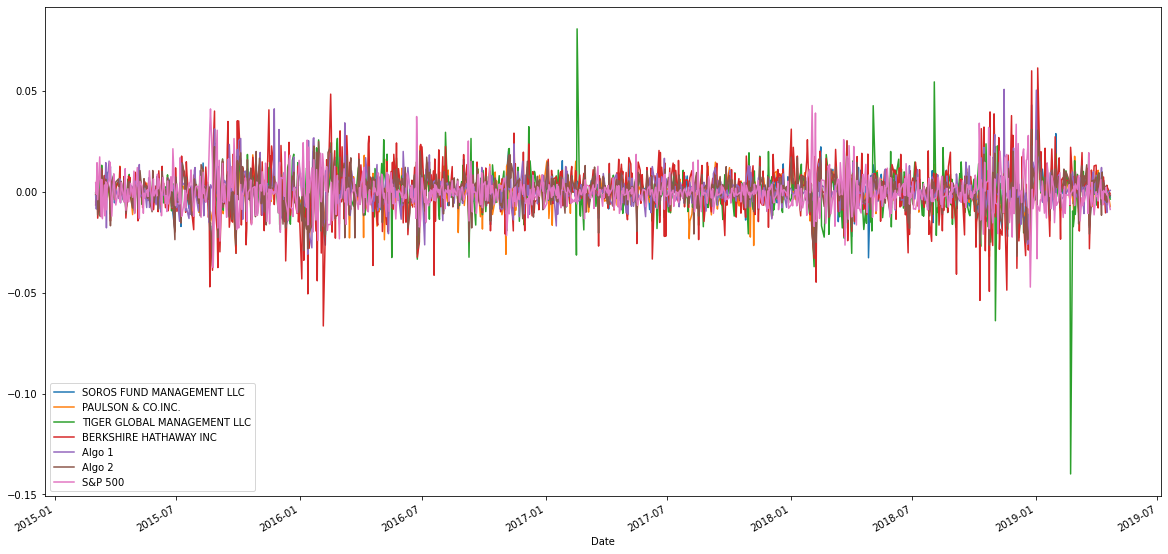

In [16]:
joined_df.plot(figsize=(20,10))

In [17]:
cumulative_returns = (1+joined_df).cumprod()
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,1.004408
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,1.003208
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,1.017632
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,1.013634
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,1.031123


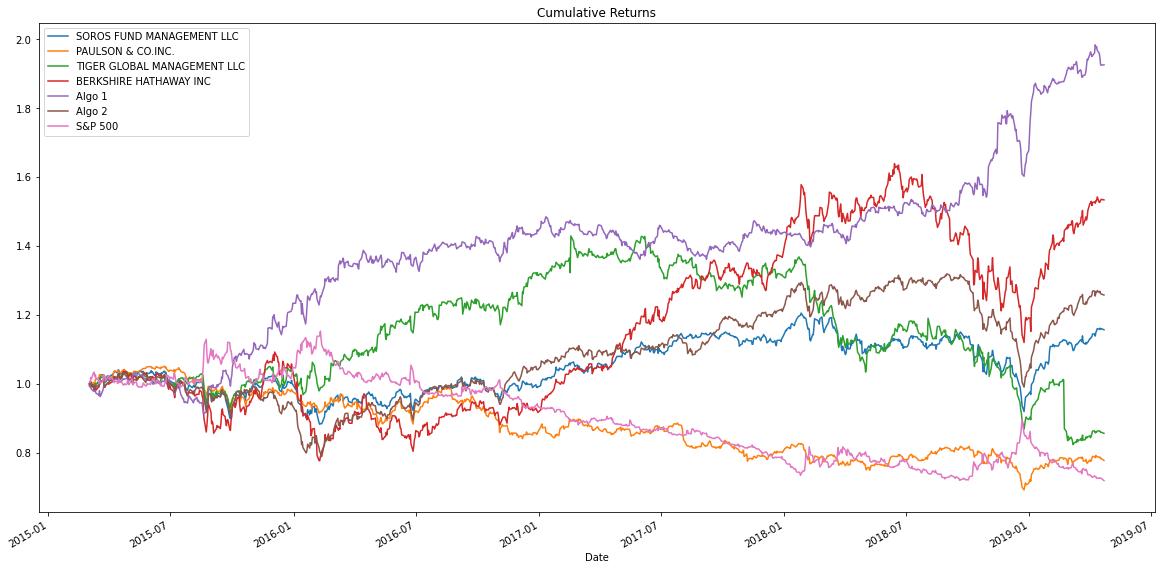

In [56]:
graph_one = cumulative_returns.plot(figsize=(20,10), title = "Cumulative Returns")
graph_one.get_figure().savefig("cumulative_returns.png",bbox_inches ="tight")

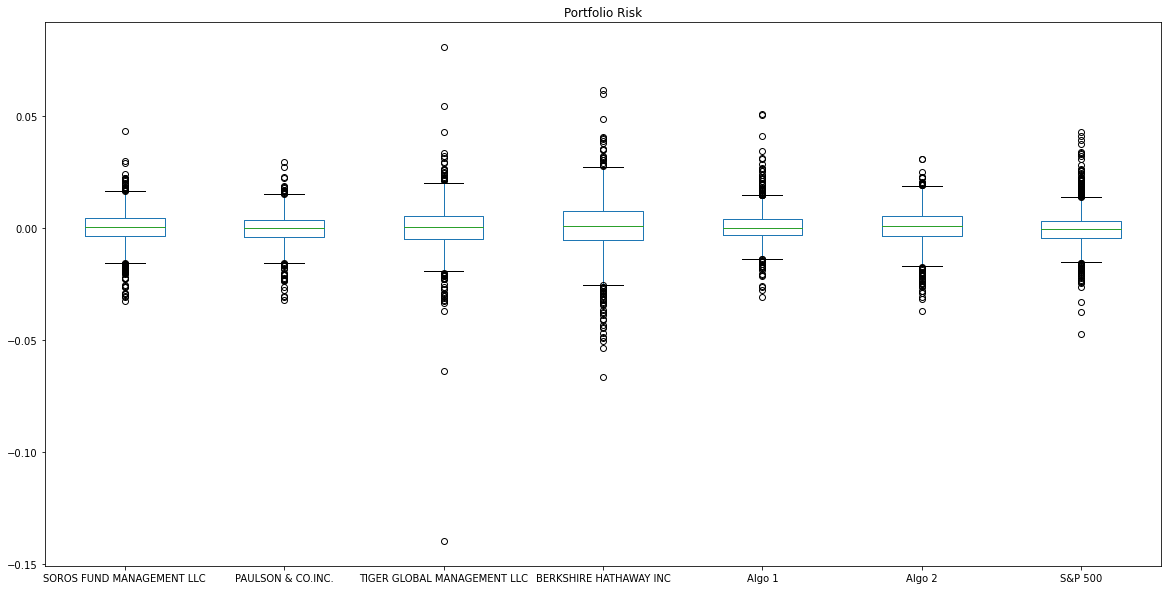

In [57]:
graph_two = joined_df.plot.box(figsize = (20,10), title= "Portfolio Risk")
graph_two.get_figure().savefig("boxplot_one.png",bbox_inches ="tight")

In [20]:
joined_daily_std = joined_df.std()
joined_daily_std.head(7)

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

In [21]:
risky = (joined_daily_std > joined_daily_std['S&P 500'])
joined_daily_std["More Risky than S&P 500"] = risky
print(joined_daily_std["More Risky than S&P 500"])

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool


In [22]:
annualized_std = joined_df.std() * np.sqrt(252)
annualized_std.head(7)

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

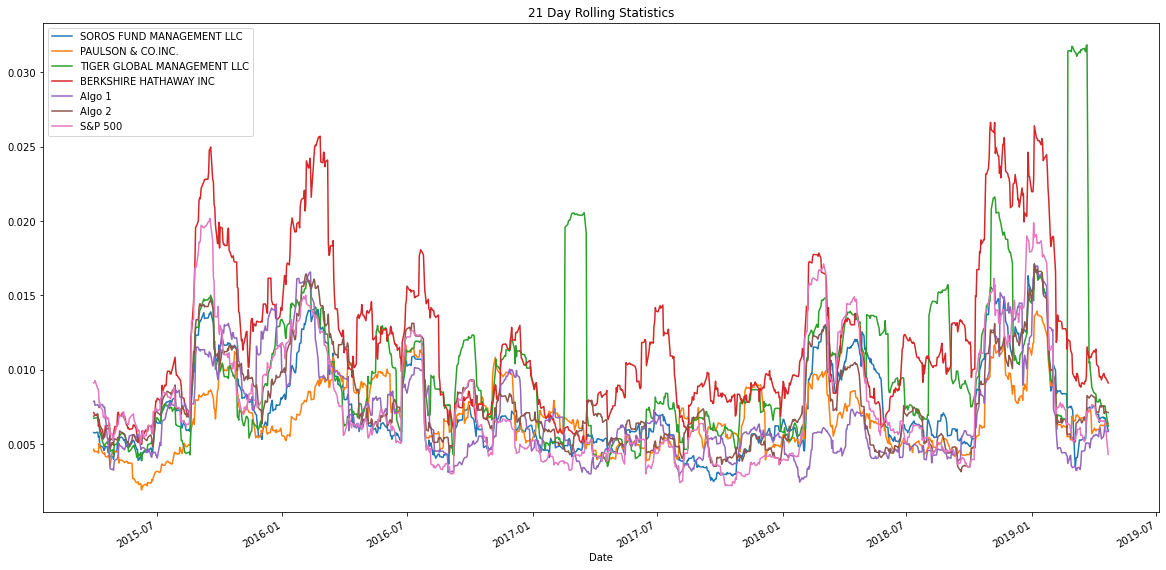

In [58]:
graph_three = joined_df.rolling(21).std().plot(figsize=(20,10), title="21 Day Rolling Statistics")
graph_three.get_figure().savefig("rolling_std.png",bbox_inches ="tight")

In [24]:
correlation = joined_df.corr()
correlation.head(7)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


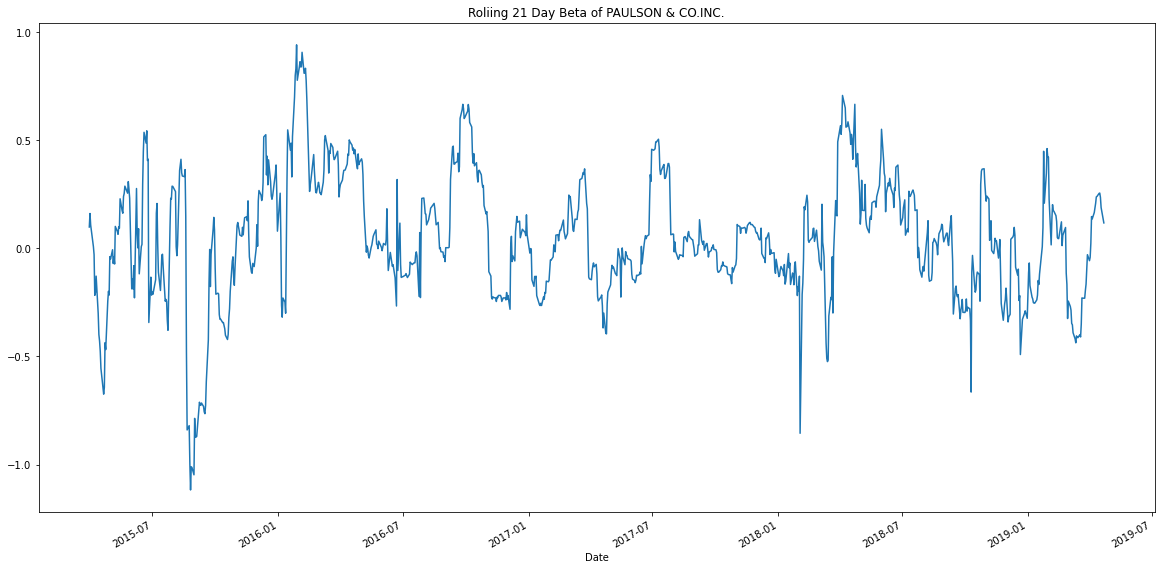

In [59]:
paulson_cov = joined_df['PAULSON & CO.INC.'].rolling(21).cov(joined_df['S&P 500'])
paulson_var = joined_df['PAULSON & CO.INC.'].rolling(21).var()
paulson_beta = paulson_cov / paulson_var

graph_four = paulson_beta.plot(figsize = (20,10), title = "Roliing 21 Day Beta of PAULSON & CO.INC.")
graph_four.get_figure().savefig("beta_one.png",bbox_inches ="tight")

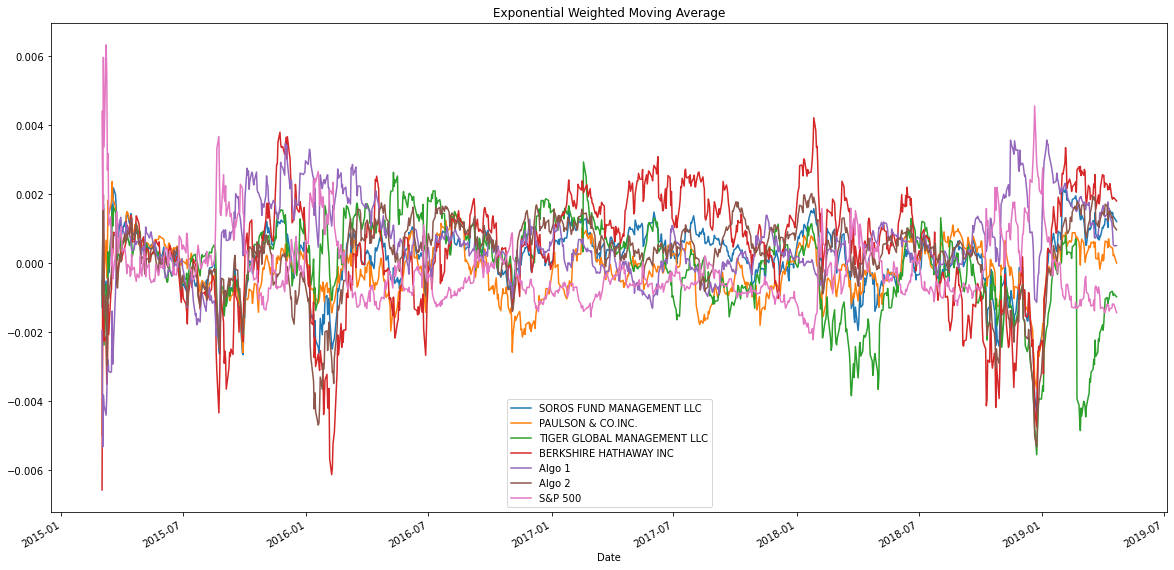

In [26]:
exp_weighted_avg = joined_df.ewm(halflife=21).mean()
exp_weighted_avg.plot(figsize = (20,10), title = "Exponential Weighted Moving Average")

In [27]:
sharpe_ratio = (joined_df.mean() * 252) / annualized_std
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

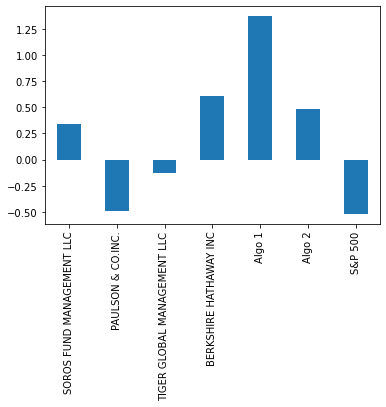

In [60]:
graph_five = sharpe_ratio.plot.bar()
graph_five.get_figure().savefig("boxplot_sharpe.png",bbox_inches ="tight")

In [29]:
amz_data_csv = Path("Resources/amz_data.csv")
amz_df = pd.read_csv(amz_data_csv)

In [30]:
amz_df.set_index(pd.to_datetime(amz_df['Date'], infer_datetime_format = True), inplace = True) 
amz_df.columns
amz_columns = ["date", "AMZ"] 
amz_df.columns = amz_columns
amz_df.drop(['date'], axis=1, inplace = True)
amz_df.head()

,AMZ
Date,
2014-01-02 16:00:00,458.31
2014-01-03 16:00:00,457.84
2014-01-06 16:00:00,456.78
2014-01-07 16:00:00,457.27
2014-01-08 16:00:00,453.52


In [31]:
amz_df.index = amz_df.index.date
amz_df.head()

,AMZ
2014-01-02,458.31
2014-01-03,457.84
2014-01-06,456.78
2014-01-07,457.27
2014-01-08,453.52


In [32]:
twtr_data_csv = Path("Resources/twtr_data.csv")
twtr_df = pd.read_csv(twtr_data_csv)

In [33]:
twtr_df.set_index(pd.to_datetime(twtr_df['Date'], infer_datetime_format = True), inplace = True) 
twtr_df.columns
twtr_columns = ["date", "TWTR"] 
twtr_df.columns = twtr_columns
twtr_df.drop(['date'], axis=1, inplace = True)
twtr_df.index = twtr_df.index.date
twtr_df.head()

,TWTR
2014-01-02,67.50
2014-01-03,69.00
2014-01-06,66.29
2014-01-07,61.46
2014-01-08,59.29


In [34]:
fb_data_csv = Path("Resources/fb_data.csv")
fb_df = pd.read_csv(fb_data_csv)

In [35]:
fb_df.set_index(pd.to_datetime(fb_df['Date'], infer_datetime_format = True), inplace = True) 
fb_df.columns
fb_columns = ["date", "FB"] 
fb_df.columns = fb_columns
fb_df.drop(['date'], axis=1, inplace = True)
fb_df.index = fb_df.index.date
fb_df.head()

,FB
2014-01-02,54.71
2014-01-03,54.56
2014-01-06,57.20
2014-01-07,57.92
2014-01-08,58.23


In [36]:
adbe_data_csv = Path("Resources/adbe_data.csv")
adbe_df = pd.read_csv(adbe_data_csv)

In [37]:
adbe_df.set_index(pd.to_datetime(adbe_df['Date'], infer_datetime_format = True), inplace = True)
adbe_df.columns
adbe_columns = ["date", "ADBE"]
adbe_df.columns = adbe_columns
adbe_df.drop(['date'], axis = 1, inplace = True)
adbe_df.index = adbe_df.index.date
adbe_df.head()

,ADBE
2014-01-02,59.29
2014-01-03,59.16
2014-01-06,58.12
2014-01-07,58.97
2014-01-08,58.90


In [38]:
custom_joined_df = pd.concat([amz_df, twtr_df, fb_df, adbe_df], axis = 'columns', join = 'inner')
custom_joined_df.head()

,AMZ,TWTR,FB,ADBE
2014-01-02,458.31,67.50,54.71,59.29
2014-01-03,457.84,69.00,54.56,59.16
2014-01-06,456.78,66.29,57.20,58.12
2014-01-07,457.27,61.46,57.92,58.97
2014-01-08,453.52,59.29,58.23,58.90


In [39]:
custom_daily_returns = custom_joined_df.pct_change().dropna()
custom_daily_returns.head()

,AMZ,TWTR,FB,ADBE
2014-01-03,-0.001026,0.022222,-0.002742,-0.002193
2014-01-06,-0.002315,-0.039275,0.048387,-0.017579
2014-01-07,0.001073,-0.072862,0.012587,0.014625
2014-01-08,-0.008201,-0.035308,0.005352,-0.001187
2014-01-09,0.000838,-0.037780,-0.017345,0.003226


In [40]:
weights = [1/4,1/4,1/4,1/4]
weighted_returns = custom_daily_returns.dot(weights)
weighted_returns.head()

2014-01-03    0.004066
2014-01-06   -0.002696
2014-01-07   -0.011144
2014-01-08   -0.009836
2014-01-09   -0.012765
dtype: float64

In [41]:
compare_custom = pd.concat([joined_df, weighted_returns], axis = "columns", join = "inner")
compare_custom = compare_custom.rename(columns = {0: 'Custom'})
compare_custom.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,-0.003052
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,-0.002303
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.003842
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.014557
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,-0.000220


In [42]:
compare_custom = compare_custom.dropna()
compare_custom.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,-0.003052
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,-0.002303
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.003842
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.014557
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,-0.000220


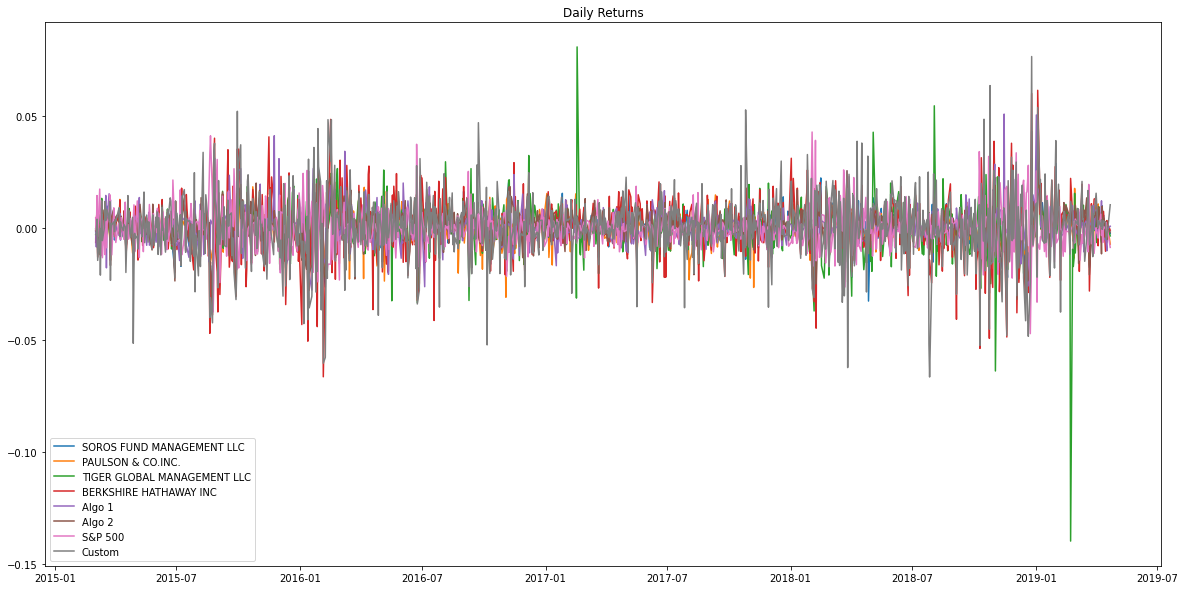

In [43]:
compare_custom.plot(figsize=(20,10), title = "Daily Returns")

In [44]:
cumulative_returns_custom = (1+compare_custom).cumprod()
cumulative_returns_custom.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,1.004408,0.996948
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,1.003208,0.994652
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,1.017632,0.998474
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,1.013634,0.983939
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,1.031123,0.983723


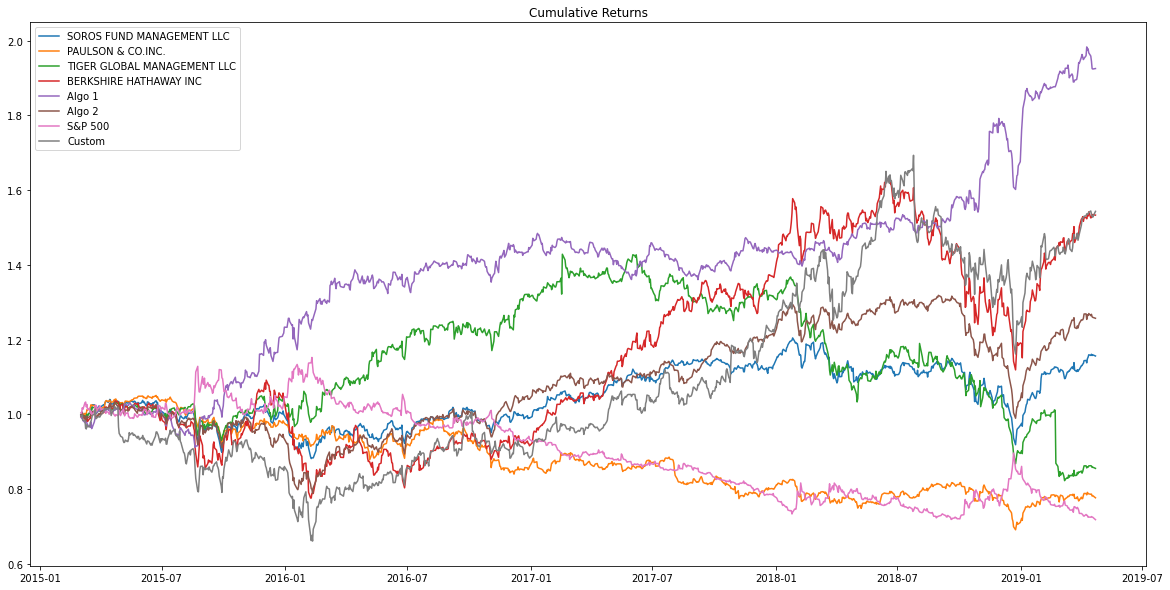

In [63]:
graph_custom = cumulative_returns_custom.plot(figsize=(20,10), title = "Cumulative Returns")
graph_custom.get_figure().savefig("cumulative_returns_two.png",bbox_inches ="tight")

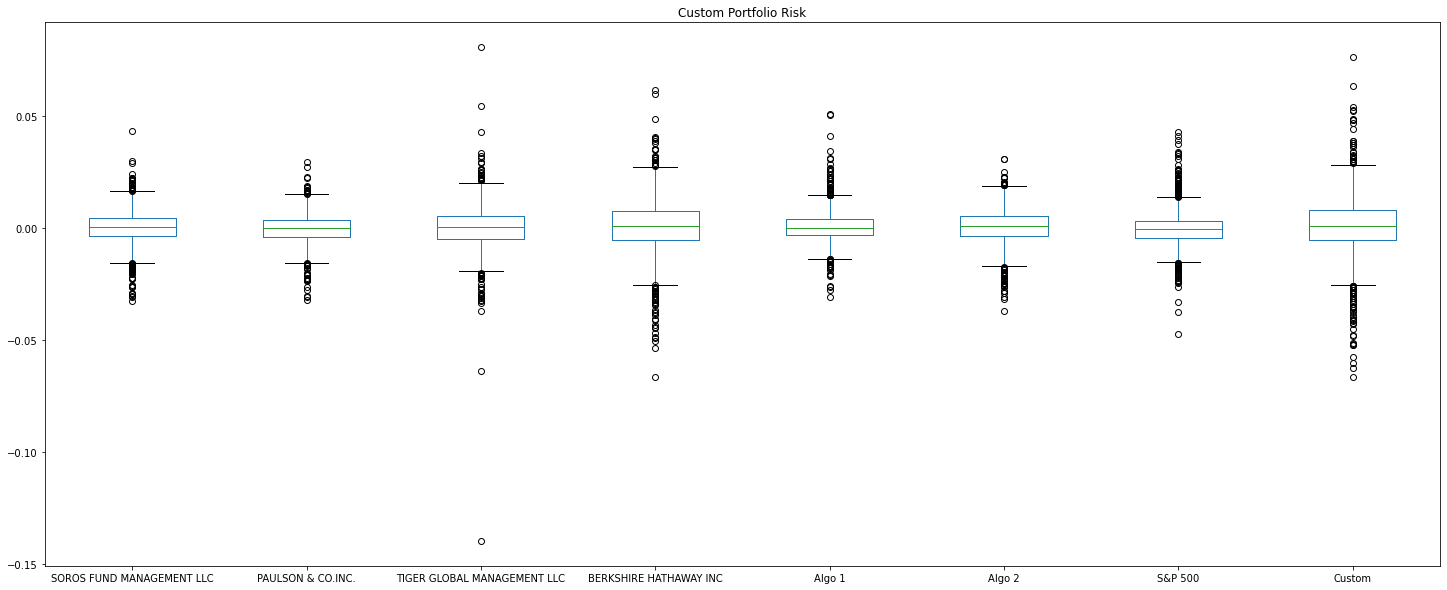

In [61]:
graph_six = compare_custom.plot.box(figsize = (25,10), title = "Custom Portfolio Risk")
graph_six.get_figure().savefig("boxplot_two.png",bbox_inches ="tight")

In [47]:
custom_std = compare_custom.std()
custom_std.head(8)

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
Custom                         0.014744
dtype: float64

In [48]:
risky_custom = (custom_std > custom_std['S&P 500'])
custom_std["More risky than S&P 500"] = risky_custom
print(custom_std["More risky than S&P 500"])

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
Custom                          True
dtype: bool


In [49]:
custom_annualized_std = compare_custom.std() * np.sqrt(252)
custom_annualized_std.head(8)

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
Custom                         0.234046
dtype: float64

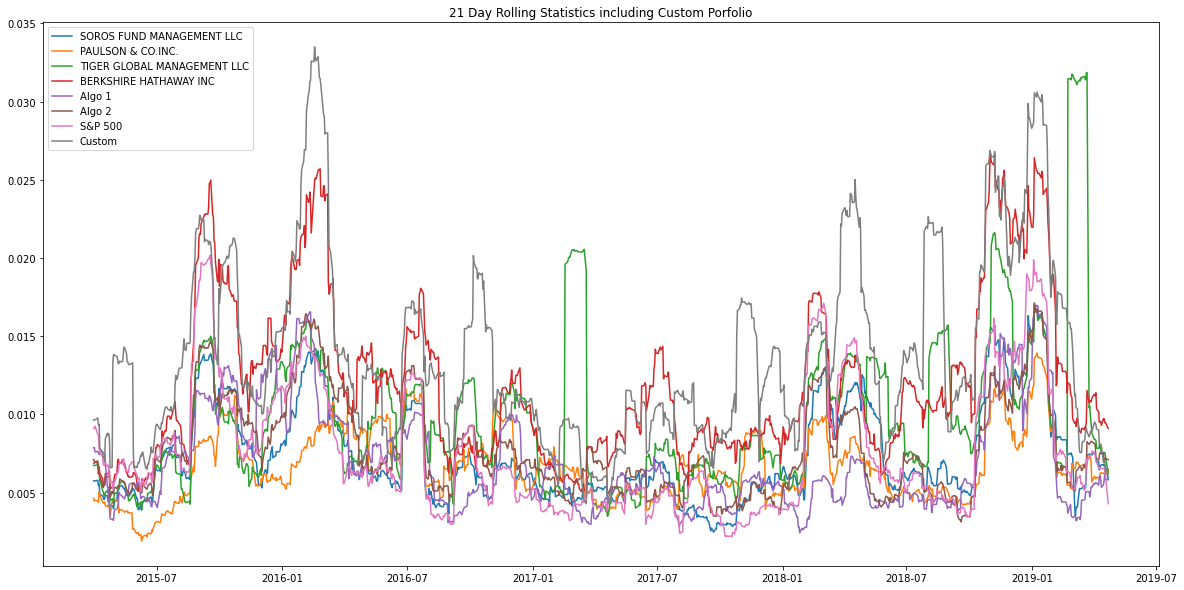

In [62]:
graph_seven = compare_custom.rolling(21).std().plot(figsize=(20,10), title="21 Day Rolling Statistics including Custom Porfolio")
graph_seven.get_figure().savefig("custom_rolling_std.png",bbox_inches ="tight")

In [51]:
sharpe_ratio_2 = (compare_custom.mean() * 252) / custom_annualized_std
sharpe_ratio_2

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
Custom                         0.565584
dtype: float64

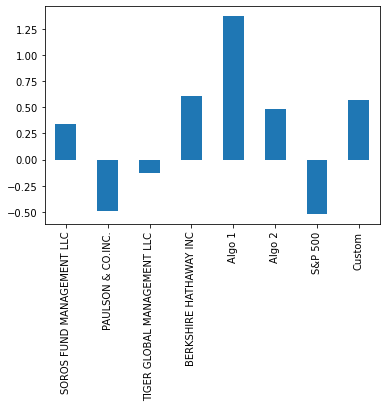

In [64]:
graph_eight = sharpe_ratio_2.plot.bar()
graph_eight.get_figure().savefig("custom_boxplot_sharpe",bbox_inches ="tight")

In [53]:
correlation_2 = compare_custom.corr()
correlation_2.head(8)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574,0.666378
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549,0.494268
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505,0.390106
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856,0.670179
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963,0.279029
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192,0.673539
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000,-0.027557
Custom,0.666378,0.494268,0.390106,0.670179,0.279029,0.673539,-0.027557,1.000000


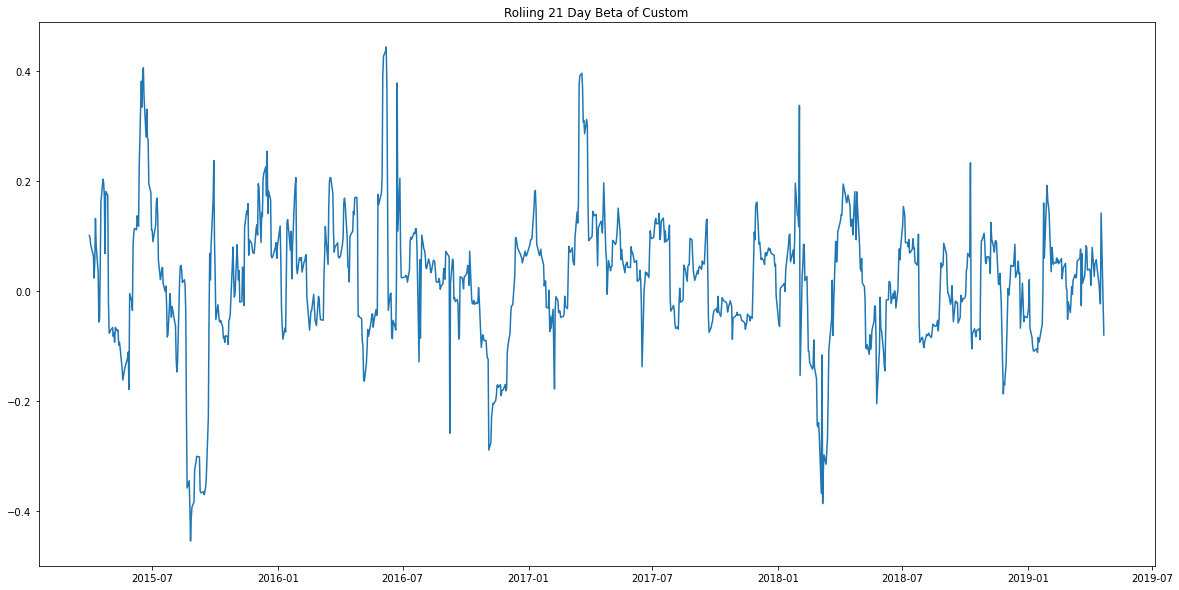

In [54]:
custom_cov = compare_custom['Custom'].rolling(21).cov(compare_custom['S&P 500'])
custom_var = compare_custom['Custom'].rolling(21).var()
custom_beta = custom_cov / custom_var

custom_beta.plot(figsize = (20,10), title = "Roliing 21 Day Beta of Custom")